In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1=pd.read_csv("/content/drive/MyDrive/data/apt_trade_part1.csv",index_col=0, parse_dates=True) #parse_dates=True 시간으로 불러오기
df2=pd.read_csv("/content/drive/MyDrive/data/apt_trade_part2.csv",index_col=0, parse_dates=True)

In [ ]:
df1.index

DatetimeIndex(['2020-05-14', '2019-07-03', '2019-07-05', '2019-08-23',
               '2019-09-20', '2019-10-29', '2019-11-08', '2019-11-18',
               '2019-12-18', '2020-02-06',
               ...
               '2019-11-11', '2020-01-02', '2020-01-31', '2020-02-04',
               '2020-02-11', '2020-04-24', '2020-05-04', '2019-09-22',
               '2019-11-19', '2019-12-20'],
              dtype='datetime64[ns]', name='cdate', length=32299, freq=None)

In [ ]:
df1.shape[0]+df2.shape[0]

74822

## 데이터 프레임 합치기

- ```python
  pd.concat([df1, df2...], axis=...)
  ```

In [ ]:
# concat의 역할 : 행 길이가 다른 데이터 두개를 합칠 때 axis(index or columns)로 접근

In [ ]:
df1.shape[0] + df2.shape[0] # column 개수 합

74822

In [ ]:
df = pd.concat([df1, df2], axis="index")


- 인덱스 정렬하기
    - ```python
df.sort_index()
```

In [ ]:
df = df.sort_index()

In [ ]:
df.head()

,apt,area,transaction,floor,built,road,year,month,day,city,gu,dong
cdate,,,,,,,,,,,,
2019-07-01,제일풍경채더퍼스트,84.1347,27100,11,2016,49,2019,7,1,대구광역시,달성군,현풍읍 중리
2019-07-01,사월화성파크드림(1단지),84.9999,37400,9,2006,달구벌대로 3304,2019,7,1,대구광역시,수성구,신매동
2019-07-01,대구노원한신더휴,59.9500,30650,25,2017,노원로10길 40,2019,7,1,대구광역시,북구,노원동3가
2019-07-01,한빛마을(성서주공3차),59.9900,15100,19,1998,선원남로 99,2019,7,1,대구광역시,달서구,이곡동
2019-07-01,시영장미3,49.8000,9800,10,1993,상화로 370,2019,7,1,대구광역시,달서구,상인동


In [ ]:
df.dtypes

apt             object
area           float64
transaction      int64
floor            int64
built            int64
road            object
year             int64
month            int64
day              int64
city            object
gu              object
dong            object
dtype: object

- timeserie index 의 좋은점

In [ ]:
df.loc["2020":] # "2020" -> "2020-1" -> "2020-2"

,apt,area,transaction,floor,built,road,year,month,day,city,gu,dong
cdate,,,,,,,,,,,,
2020-01-01,밀레니엄,106.8300,40000,5,2001,신암북로7길 59,2020,1,1,대구광역시,동구,신암동
2020-01-01,청구타운,84.9250,28900,17,1995,진천로 41,2020,1,1,대구광역시,달서구,진천동
2020-01-01,수성풀비체,84.7456,32100,4,2007,화랑로32길 91,2020,1,1,대구광역시,수성구,만촌동
2020-01-01,시지3태왕하이츠,85.0000,33000,6,2001,욱수천로 77,2020,1,1,대구광역시,수성구,신매동
2020-01-01,대실역동화아이위시,84.7680,35000,7,2008,대실역북로 55,2020,1,1,대구광역시,달성군,다사읍 매곡리
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31,아름다운나날3,84.6139,31900,15,2003,동호로 132,2021,5,31,대구광역시,동구,신서동
2021-05-31,화성그랜드파크,110.4038,48000,3,2003,구암로65길 9,2021,5,31,대구광역시,북구,구암동
2021-05-31,내당시영,55.3400,34150,3,1979,서대구로8길 15,2021,5,31,대구광역시,서구,내당동


## Group by: split-apply-combine

By “[group by](https://pandas.pydata.org/docs/user_guide/groupby.html)” we are referring to a process involving one or more of the following steps:

- **Splitting** the data into groups based on some criteria.
- **Applying** a function to each group independently.
- **Combining** the results into a data structure.

- 동구의 거래대금의 중간값을 구해보자

In [ ]:
gu_condition = df.gu == "동구"
df.loc[gu_condition]['transaction'].median() # mean() : 평균값

26500.0

### ex)
- 자신이 살고 있는 구의 거래 금액에 대한 중간값을 알아보자

In [ ]:
gu_cond= df.gu=="달서구"
df.loc[gu_cond]['transaction'].median()

28000.0

- `groupby` method 를 통해서 각 구의 거래 금액의 중간값을 알아보자

In [ ]:
df.groupby('gu')['transaction'].median()

gu
남구     29500
달서구    28000
달성군    22800
동구     26500
북구     22700
서구     26500
수성구    39300
중구     47000
Name: transaction, dtype: int64

- groupby 의 이해

In [ ]:
df.groupby('gu')['transaction']

In [ ]:
for a, b, in df.groupby('gu')['transaction']: # a : 구이름, b : transacion값
    print(a, b.shape)

남구 (2021,)
달서구 (19754,)
달성군 (10837,)
동구 (10045,)
북구 (14768,)
서구 (2263,)
수성구 (12973,)
중구 (2161,)


### 1. splitting

In [ ]:
df.groupby('gu')

In [ ]:
df.groupby('gu').groups # 인덱스 값 모두 불러오기

{'남구': [2019-07-01 00:00:00, 2019-07-01 00:00:00, 2019-07-01 00:00:00, 2019-07-01 00:00:00, 2019-07-01 00:00:00, 2019-07-01 00:00:00, 2019-07-02 00:00:00, 2019-07-03 00:00:00, 2019-07-03 00:00:00, 2019-07-03 00:00:00, 2019-07-04 00:00:00, 2019-07-04 00:00:00, 2019-07-05 00:00:00, 2019-07-06 00:00:00, 2019-07-06 00:00:00, 2019-07-06 00:00:00, 2019-07-08 00:00:00, 2019-07-08 00:00:00, 2019-07-08 00:00:00, 2019-07-09 00:00:00, 2019-07-09 00:00:00, 2019-07-10 00:00:00, 2019-07-10 00:00:00, 2019-07-11 00:00:00, 2019-07-12 00:00:00, 2019-07-12 00:00:00, 2019-07-12 00:00:00, 2019-07-12 00:00:00, 2019-07-13 00:00:00, 2019-07-14 00:00:00, 2019-07-14 00:00:00, 2019-07-15 00:00:00, 2019-07-15 00:00:00, 2019-07-15 00:00:00, 2019-07-15 00:00:00, 2019-07-15 00:00:00, 2019-07-15 00:00:00, 2019-07-15 00:00:00, 2019-07-15 00:00:00, 2019-07-16 00:00:00, 2019-07-16 00:00:00, 2019-07-16 00:00:00, 2019-07-16 00:00:00, 2019-07-16 00:00:00, 2019-07-17 00:00:00, 2019-07-17 00:00:00, 2019-07-17 00:00:00, 2019-

In [ ]:
def month_split(index): 
    return index.month # parse_date=True 한게 여기서 쓰임

df.groupby(month_split)['transaction'].max()

1     245000
2     190000
3     243000
4     250000
5     235000
6     220000
7     345000
8     207000
9     249000
10    245000
11    345000
12    255000
Name: transaction, dtype: int64

### 2. apply & combining

In [ ]:
target_cols = ['transaction', 'built']
df.groupby('gu')[target_cols].min() # 이렇게 하면 5900만원인 건물에 대한 건축년도를 불러올 가능성 있음 확인 과정 필요

,transaction,built
gu,,
남구,5900,1977
달서구,4000,1978
달성군,1500,1984
동구,4700,1974
북구,4800,1978
서구,5220,1978
수성구,7300,1976
중구,5000,1973


In [ ]:
#df.groupby('gu')['built'].min() 

In [ ]:
df.groupby('gu')[['transaction','month','year','area']].min()

,transaction,month,year,area
gu,,,,
남구,5900,1,2019,35.2750
달서구,4000,1,2019,30.6000
달성군,1500,1,2019,23.1000
동구,4700,1,2019,17.8000
북구,4800,1,2019,22.2388
서구,5220,1,2019,22.9500
수성구,7300,1,2019,11.8800
중구,5000,1,2019,12.6520


In [ ]:
df.groupby('apt')['transaction'].agg(['min', 'max', 'median'])

,min,max,median
apt,,,
(1197-20),28000,33700,29500.0
(417-2),22000,25800,24800.0
(420-0),23500,23800,23650.0
(화원)영남,16800,29500,23900.0
(화원)청구청탑맨션,12000,24700,15300.0
...,...,...,...
희망교대성유니드,24500,58000,32100.0
힐데스하임아파트,19000,32950,24900.0
힐스테이트 범어,104100,200000,151000.0


### ex)
거래대금이 가장 변동성이 높은 구를 고르시요 hint : sort_values

In [ ]:
pd.Series.std?

In [ ]:
df.transaction.std??

In [ ]:
df['transaction'].std??

Object `std` not found.


In [ ]:
for a, b, in df.groupby('gu')['transaction']: # a : 구이름, b : transacion값
    print(a, b.shape, type(b))

남구 (2021,) <class 'pandas.core.series.Series'>
달서구 (19754,) <class 'pandas.core.series.Series'>
달성군 (10837,) <class 'pandas.core.series.Series'>
동구 (10045,) <class 'pandas.core.series.Series'>
북구 (14768,) <class 'pandas.core.series.Series'>
서구 (2263,) <class 'pandas.core.series.Series'>
수성구 (12973,) <class 'pandas.core.series.Series'>
중구 (2161,) <class 'pandas.core.series.Series'>


In [ ]:
df.groupby('gu')['transaction'].std().sort_values(ascending=False) # 변동성 : 표준편차 std() 사용 / ascending=True : 오름차순

gu
수성구    32713.633015
달서구    15850.797591
중구     15751.054449
남구     13076.174494
북구     12966.683614
동구     11986.849957
서구     11385.730106
달성군    10975.464711
Name: transaction, dtype: float64

거래대금이 가장 변동성이 높은 아파트를 10개를 출력해보세요


In [ ]:
#df.groupby('apt')['transaction'].std().sort_values(ascending=False).head(10)
df.groupby('apt')['transaction'].std().nlargest(10) # nsmallest 도 있음 -> 이런 메소드를 쓰면 효율성 훨씬 좋다

apt
태왕아너스         42160.360147
수성포레힐         41605.288125
두산위브더제니스      38028.892459
수성하이츠         37925.332116
유림노르웨이숲       30616.494793
현대하이페리온2단지    30471.805860
경남타운          30112.092176
범어롯데캐슬        29530.375040
범어에스케이뷰       29463.156095
을지맨션          27638.595359
Name: transaction, dtype: float64

### plot

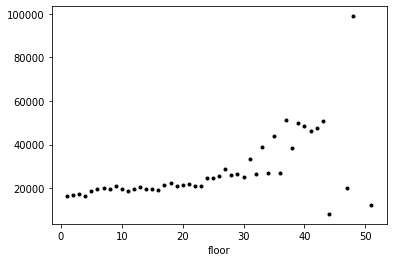

In [ ]:
df.groupby('floor').transaction.std().plot(style="k.") # pandas에서 바로 연결 "k." : 검은색 점
# 원래는 import matplotlib.pyplot as plt 주로 사용

### ex)

가로축(x)은 건물의 최고높이, 세로축(y)은 그 건물의 거래금액 중간값으로 해서, scatter plot 으로 그리시오

- hint: 
```python
        >>> pd.DataFrame.plot(x='...', y='...', kind='scatter')
```

In [ ]:
f=df.groupby('apt').floor.max()
t = df.groupby('apt').transaction.median()
tmp_df = pd.concat([f,t], axis=1)
tmp_df.head(2)

,floor,transaction
apt,,
(1197-20),9,29500.0
(417-2),9,24800.0


In [1]:
# x - x.min()/(x.max()-x.min())       # 같은 범위로 줄여서 할 수 있다.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


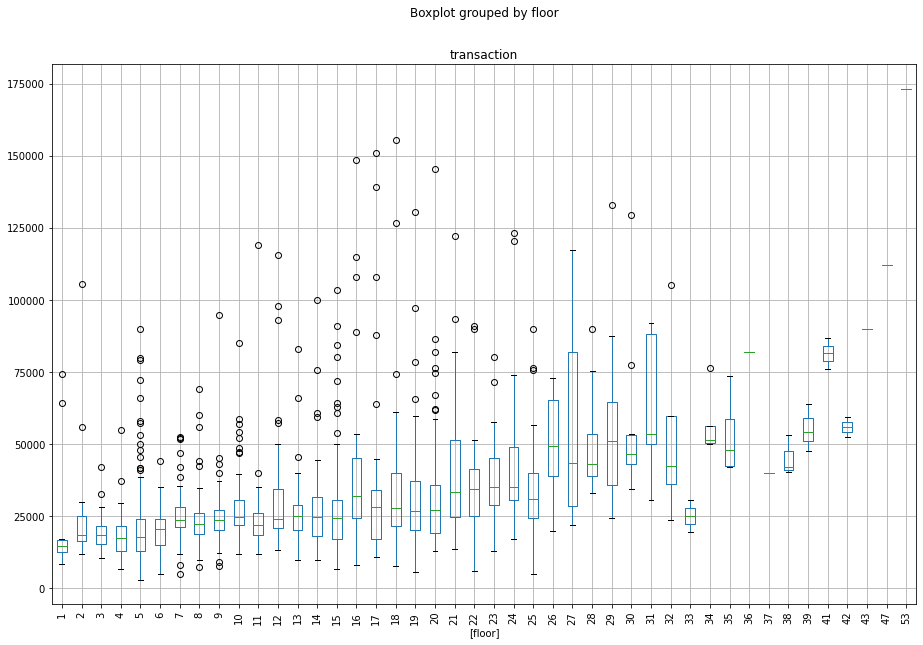

In [ ]:
tmp_df.boxplot(by="floor", rot=90, figsize=(15,10))

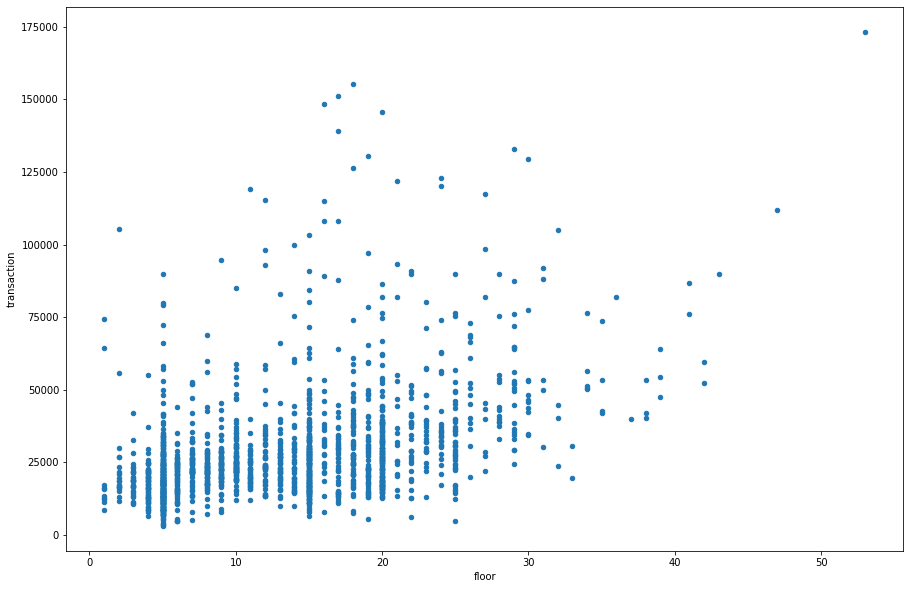

In [ ]:
tmp_df.plot(x='floor',y='transaction', kind='scatter', figsize=(15,10))

# Quiz

- 가장 거래가 많이 일어난 아파트는?

In [ ]:
df.groupby('apt').transaction.count().nlargest()

apt
대구테크노폴리스남해오네뜨1차    792
대구월배2차 아이파크        478
청구타운               359
월성주공4단지            333
태왕메트로시티            332
Name: transaction, dtype: int64

In [ ]:
df.groupby('apt').transaction.count().sort_values(ascending=False)[:5]

apt
대구테크노폴리스남해오네뜨1차    792
대구월배2차 아이파크        478
청구타운               359
월성주공4단지            333
태왕메트로시티            332
Name: transaction, dtype: int64

- 가장 거래금액이 컸던 아파트는?

In [ ]:
df.groupby('apt').transaction.max().nlargest(5)

apt
두산위브더제니스    345000
태왕아너스       243000
힐스테이트 범어    200000
범어에스케이뷰     198000
범어동일하이빌     197000
Name: transaction, dtype: int64

- 각자 살고있는 구에서 가장 비싼 아파트는 어디인가?

In [ ]:
gu_condition = df.gu == '북구'

df.loc[gu_condition].groupby('apt').transaction.max().nlargest()

apt
침산1차푸르지오(2-5)       108000
코오롱하늘채2단지           104000
오페라 삼정 그린코아 더베스트     97000
침산1차푸르지오(2-2)        93000
매천화성파크드림             79500
Name: transaction, dtype: int64

In [ ]:
df.gu.nunique()     # len(df.gu.unique())

8

In [ ]:
apt_name = df.loc[gu_condition].groupby('apt').transaction.max().nlargest(1)
apt_name.index[0], apt_name.values

('아리랑빌라트', array([100000]))

In [ ]:
for gu_name in df.gu.unique():
    gu_condition = df.gu == gu_name
    apt_name = df.loc[gu_condition].groupby('apt').transaction.max().nlargest(1)
    print(f"{gu_name}>>> 아파트이름: {apt_name.index[0]}, 가격: {apt_name.array[0]:,}만원")

달성군>>> 아파트이름: 죽곡푸르지오2단지, 가격: 79,000만원
수성구>>> 아파트이름: 두산위브더제니스, 가격: 345,000만원
북구>>> 아파트이름: 침산1차푸르지오(2-5), 가격: 108,000만원
달서구>>> 아파트이름: 월드마크웨스트엔드, 가격: 152,000만원
서구>>> 아파트이름: 광장타운1차, 가격: 93,000만원
동구>>> 아파트이름: 현대하이페리온2단지, 가격: 185,000만원
중구>>> 아파트이름: 센트로팰리스, 가격: 119,800만원
남구>>> 아파트이름: 아리랑빌라트, 가격: 100,000만원


- 2020년 이후의 거래에서, 평당 가격이 가장 비싼 아파트는 어디인가?


In [ ]:
new_df = df.assign(ta= df['transaction']/df['area'])

new_df.sort_values(by='ta')

,apt,area,transaction,floor,built,road,year,month,day,city,gu,dong,ta
cdate,,,,,,,,,,,,,
2020-07-28,논공삼주,43.8300,1500,5,1990,논공로7길 55,2020,7,28,대구광역시,달성군,논공읍 남리,34.223135
2020-07-06,평광현대,35.7900,1500,5,1989,논공로21길 15,2020,7,6,대구광역시,달성군,논공읍 북리,41.911148
2019-10-28,평광현대,35.7900,1500,5,1989,논공로21길 15,2019,10,28,대구광역시,달성군,논공읍 북리,41.911148
2020-12-30,논공삼주,43.8300,2000,5,1990,논공로7길 55,2020,12,30,대구광역시,달성군,논공읍 남리,45.630846
2020-12-04,"경일(1,2,3동)",50.0550,2500,5,1987,논공로9길 39,2020,12,4,대구광역시,달성군,논공읍 남리,49.945060
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-15,만촌삼정그린코아에듀파크,75.9909,139000,12,2019,교학로 65,2020,10,15,대구광역시,수성구,만촌동,1829.166387
2021-05-13,힐스테이트 범어,84.9218,160000,17,2020,범어로18길 22,2021,5,13,대구광역시,수성구,범어동,1884.086301
2021-05-22,힐스테이트 범어,84.9218,160000,9,2020,범어로18길 22,2021,5,22,대구광역시,수성구,범어동,1884.086301


- 2020년 이후의 거래에서, 평당 가격의 최대 최소 차이가 가장 많이 나는 아파트 5개를 알아보자

In [ ]:
after_df = new_df.loc["2020":]
after_df.groupby('apt').ta.agg(lambda x: x.max()-x.min()).nlargest(5)

apt
경남타운      1100.516964
광명         997.931738
동진         900.938821
우방청솔맨션     850.850851
청구타운       844.082435
Name: ta, dtype: float64

# Aggregation

In [ ]:
import numpy as np

In [ ]:
df.dtypes

In [ ]:
number_df = df.select_dtypes(include=["number"])        # 숫자형태의 데이터만 골라오겠다는 의미
number_df.sample(2)

In [ ]:
number_df.area.agg(sum)

In [ ]:
sum([1,2,3,4])

In [ ]:
number_df.area.agg(lambda x: x.sum())

In [ ]:
number_df.agg(sum)

In [ ]:
number_df.agg(['sum', 'mean'])

In [ ]:
def my_sum(data):           # 내가 직접 함수를 만들어서도 작성 가능하다.
    return data.sum()

number_df.agg([sum, lambda x: x.sum(), my_sum])

# Aggregation with dict

In [ ]:
number_df.agg({         # 원하는 부분만 보고 싶을때 딕셔너리 사용해서 가능하다.
    "transaction" : "median",
    "floor" : "max"
})

In [ ]:
number_df.agg({
    "transaction" : ["median", "mean"],
    "floor" : "max"
})

# Custom describe

In [ ]:
from functools import partial

In [ ]:
cal_return("네이버")    ##############?????????????????###################

In [ ]:
def cal_return(stock, date="2020"):     # 잘 실수하는 값을 2020이라고 했을 때 이걸 고정시키면 사용자는 stock만 바꿔서 사용하면 됨
    print(f"stock:{stock}")
    print(date)
    return 0.3

In [ ]:
# cal_return(stock, date="20210101")

cal_return_with_date = partial(cal_return, date="20210101")

In [ ]:
cal_return_with_date

In [ ]:
cal_return_with_date("네이버")

In [ ]:
a = 3.2345

text = "This is a number"

print(f"This is a number{a:27}")

In [ ]:
q_25 = partial(pd.Series.quantile, q=0.25)      # 위에꺼는 사용자 직접 함수이고 이건 파이썬 내에 있는 함수

In [ ]:
q_25.__name__ = "25%"

In [ ]:
number_df.agg([q_25])

In [ ]:
q_25

# Quiz. number_df.describe(), DIY

In [ ]:
number_df.describe()

In [ ]:
q_25 = partial(pd.Series.quantile, q=0.25)
q_25.__name__ = "25%"

q_50 = partial(pd.Series.quantile, q=0.50)
q_50.__name__ = "50%"

q_75 = partial(pd.Series.quantile, q=0.75)
q_75.__name__ = "75%"

In [ ]:
number_df.agg(["count", "mean", "std", "min", q_25, q_50, q_75, "max"])

In [ ]:
%timeit number_df['area'].apply(lambda x: x+1)
%timeit -n 100 -r 3 number_df[['area']].apply(lambda x: x+1)        # %timeit -n 숫자1 -r 숫자2 코드
                                                                    # n은 숫자1만큼 loops 돌리고 r은 숫자2만큼 runs 돌린다. 
                                                                    # 총 (숫자1 x 숫자2) 번 돌아간다.

# Transformation

In [ ]:
number_df.transaction.transform(lambda x: x+1)

In [ ]:
number_df.transaction.transform([abs, lambda x: x+1])

In [ ]:
number_df.transform([abs, lambda x: x+1])

In [ ]:
number_df.transform({       # 앞의 aggregation과는 달리 Nan값이 없다
    "transaction" : lambda x: x*10000,
    "floor" : [lambda x: x+2, "abs"]
})